# Coleta de dados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
customers = pd.read_csv("datasets/olist_customers_dataset.csv")
location = pd.read_csv("datasets/olist_geolocation_dataset.csv")
items = pd.read_csv("datasets/olist_order_items_dataset.csv")
payments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
reviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
orders = pd.read_csv("datasets/olist_orders_dataset.csv")
products = pd.read_csv("datasets/olist_products_dataset.csv")
sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")

# Pré-Processamento dos Dados

## Definindo Tipos

In [ ]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
location.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
payments["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [ ]:
items["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [ ]:
items["freight_value"].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [ ]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
customers["customer_city"] = customers["customer_city"].astype("category")
customers["customer_state"] = customers["customer_state"].astype("category")
customers.dtypes

customer_id                   object
customer_unique_id            object
customer_zip_code_prefix       int64
customer_city               category
customer_state              category
dtype: object

In [ ]:
location.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [ ]:
location["geolocation_city"] = location["geolocation_city"].astype("category")
location["geolocation_state"] = location["geolocation_state"].astype("category")
location.dtypes

geolocation_zip_code_prefix       int64
geolocation_lat                 float64
geolocation_lng                 float64
geolocation_city               category
geolocation_state              category
dtype: object

In [ ]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [ ]:
payments["payment_type"] = payments["payment_type"].astype("category")
payments.dtypes

order_id                  object
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

In [ ]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [ ]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
orders["order_status"] = orders["order_status"].astype("category")
orders.dtypes

order_id                           object
customer_id                        object
order_status                     category
order_purchase_timestamp           object
order_approved_at                  object
order_delivered_carrier_date       object
order_delivered_customer_date      object
order_estimated_delivery_date      object
dtype: object

In [ ]:
location["geolocation_city"].cat.categories

Index(['* cidade', '...arraial do cabo', '4o. centenario', '4º centenario',
       'abadia de goias', 'abadia dos dourados', 'abadiania', 'abadiânia',
       'abaete', 'abaetetuba',
       ...
       'águas vermelhas', 'águia branca', 'álvares florence',
       'álvares machado', 'álvaro de carvalho', 'áurea', 'ângulo',
       'érico cardoso', 'óbidos', 'óleo'],
      dtype='object', length=8011)

In [ ]:
payments["payment_type"].cat.categories

Index(['boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher'], dtype='object')

## Tratamento de dados ausentes

In [ ]:
payments.shape

(103886, 5)

In [ ]:
print(payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
print(location.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [ ]:
print(reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
print(customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
print(items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
orders2 = orders.dropna()
print(f"Com nulos: {orders.shape}\nSem Nulos: {orders2.shape}")

Com nulos: (99441, 8)
Sem Nulos: (96461, 8)


In [ ]:
print(orders2.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


## Normalização e Discretização

In [ ]:
scaler = MinMaxScaler()
items['price_norm'] = scaler.fit_transform(items[['price']])
items['price_norm'].describe()

count    112650.000000
mean          0.017790
std           0.027269
min           0.000000
25%           0.005799
50%           0.011010
75%           0.019906
max           1.000000
Name: price_norm, dtype: float64

In [ ]:
items["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [ ]:
payments["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [ ]:
payments["payment_value_dist"] = pd.qcut(payments["payment_value"],3)

In [ ]:
payments["payment_value_dist"].value_counts()

(-0.001, 69.04]       34645
(69.04, 142.54]       34623
(142.54, 13664.08]    34618
Name: payment_value_dist, dtype: int64

<AxesSubplot:>

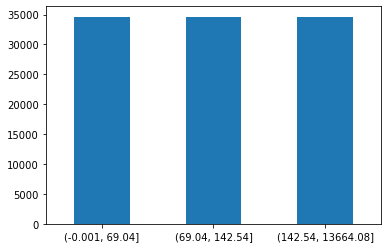

In [ ]:
counts = payments['payment_value_dist'].value_counts()
counts.plot.bar(rot=0)

## Limpeza de Dados (Univariado e Bivariado)

In [ ]:
payments["payment_installments"].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

<AxesSubplot:>

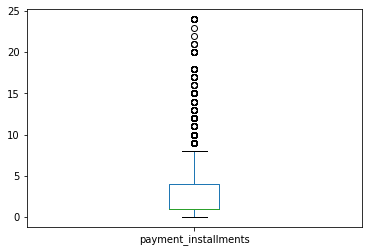

In [ ]:
payments["payment_installments"].plot.box()

<AxesSubplot:>

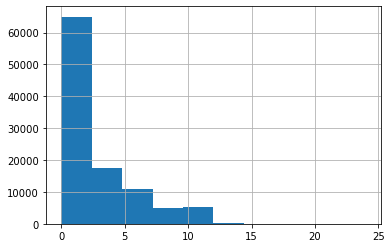

In [ ]:
payments["payment_installments"].hist()

In [ ]:
items["freight_value"].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

<AxesSubplot:>

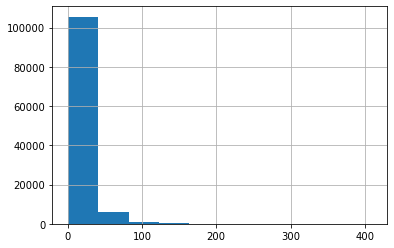

In [ ]:
items["freight_value"].hist()

<AxesSubplot:xlabel='payment_installments', ylabel='payment_value'>

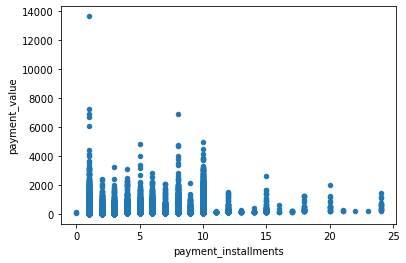

In [ ]:
payments.plot.scatter(x="payment_installments",y="payment_value")

<AxesSubplot:>

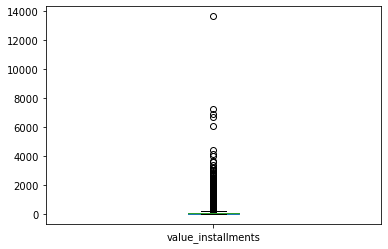

In [ ]:
payments["value_installments"] = payments["payment_value"] / payments["payment_installments"]
payments["value_installments"].describe()
payments["value_installments"].plot.box()

<AxesSubplot:xlabel='price', ylabel='freight_value'>

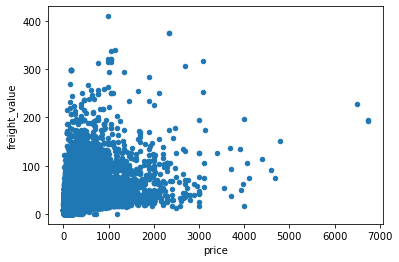

In [ ]:
items.plot.scatter(x="price",y="freight_value")

In [ ]:
products["product_weight_g"].describe()

count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [ ]:
products["volume_cm3"] = products["product_length_cm"]*products["product_width_cm"]*products["product_height_cm"]
products["volume_cm3"].describe()

count     32949.000000
mean      16564.096695
std       27057.041650
min         168.000000
25%        2880.000000
50%        6840.000000
75%       18480.000000
max      296208.000000
Name: volume_cm3, dtype: float64

<AxesSubplot:xlabel='volume_cm3', ylabel='product_weight_g'>

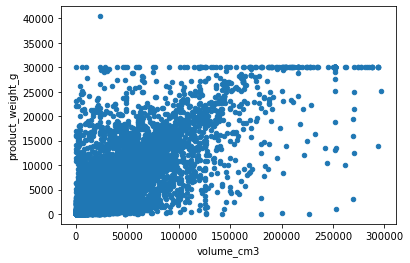

In [ ]:
products.plot.scatter(x="volume_cm3",y="product_weight_g")

<AxesSubplot:>

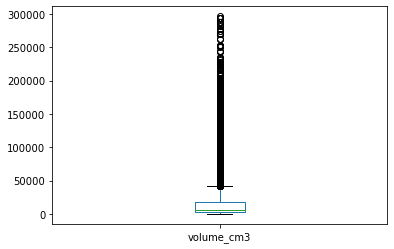

In [ ]:
products["volume_cm3"].plot.box()

<AxesSubplot:>

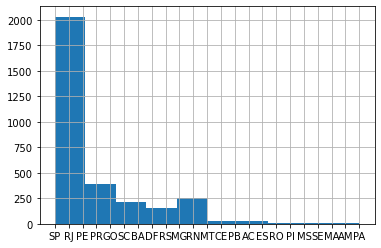

In [65]:
sellers["seller_state"].hist()

<AxesSubplot:>

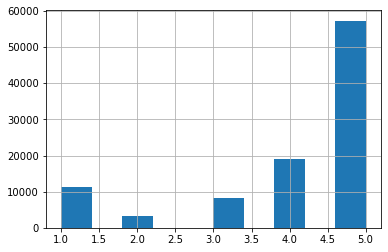

In [55]:
reviews["review_score"].hist()

<AxesSubplot:xlabel='price', ylabel='freight_value'>

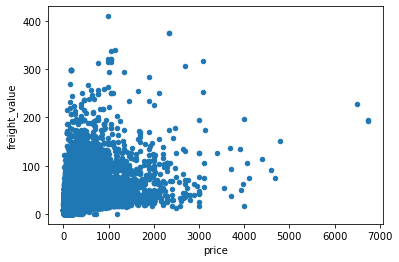

In [59]:
items.plot.scatter(x="price",y="freight_value")